In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import math
from scipy import special

In [2]:
def funU(x,y):
    beta = 1/30
    a = np.array([-1,-1,-6.5,0.7])
    b = np.array([0,0,11,0.6])
    c = np.array([-10,-10,-6.5,0.7])
    D = np.array([-200,-100,-170,15])
    X = np.array([1,0,-0.5,-1])
    Y = np.array([0,0.5,1.5,1])
    gamma = 9
    k = 5
  
    fx1 = D[0]*np.exp(a[0]*((x-X[0])**2) + b[0]*(x-X[0])*(y-Y[0]) + c[0]*(y**2))
    fx2 = D[1]*np.exp(a[1]*((x-X[1])**2) + b[1]*(x-X[1])*(y-Y[1]) + c[1]*((y-Y[1])**2))
    fx3 = D[2]*np.exp(a[2]*((x-X[2])**2) + b[2]*(x-X[2])*(y-Y[2]) + c[2]*((y-Y[2])**2))
    fx4 = D[3]*np.exp(a[3]*((x-X[3])**2) + b[3]*(x-X[3])*(y-Y[3]) + c[3]*((y-Y[3])**2))
    extra = gamma*np.sin(2*k*math.pi*x)*np.sin(2*k*math.pi*y)
    
    U = fx1+fx2+fx3+fx4
#     U = U+extra
#     U = -beta*U
    U = np.exp(-beta*U)
    
    return U

In [3]:
pol_deg_x = 19
pol_deg_y = 19
x_vec = np.linspace(-1.5,1,pol_deg_x*2)
y_vec = np.linspace(-0.5,2,pol_deg_y*2)

for xi in range(len(x_vec)):
    x = x_vec[xi]
    func_U_fix_x = funU(x,y_vec)
    coef = np.polynomial.legendre.legfit(y_vec,func_U_fix_x,pol_deg_y-1)[:,None]
    if xi == 0:
        COEF = coef
    else: 
        COEF = np.column_stack((COEF,coef))
        
print(COEF.shape)

(19, 38)


In [4]:
# Take row vectors of COEF as function value at interpolation points
for yi in range(pol_deg_y):
    func_value = COEF[yi,:]
    curr_coef = np.polynomial.legendre.legfit(x_vec,func_value,pol_deg_x-1)[:,None]
    if yi == 0:
        ALL_COEF = curr_coef
    else: 
        ALL_COEF = np.column_stack((ALL_COEF,curr_coef))
        
        
print(ALL_COEF.shape)

#ALL_COEF[j,k] represent the coefficient for kth phi(x) * jth psi(j)

(19, 19)


In [5]:
x = np.linspace(0,1,101)
# x = 0.5*np.ones(41)
y = np.linspace(0,1.2,101)
XX,YY = np.meshgrid(x,y)
XX = XX.ravel()
YY = YY.ravel()

In [6]:
def calc_pol(max_pol_deg):
    pol = []
    pol_deg = max_pol_deg+1
    for deg in range(pol_deg):
        p_deg = special.legendre(deg)
        pol.append(p_deg)
        
    return pol

In [7]:
legen_x = calc_pol(pol_deg_x-1)
legen_y = calc_pol(pol_deg_y-1)

# print(legen_x)

In [8]:
estimate = 0
for j in range(pol_deg_y):
    for k in range(pol_deg_x):
        estimate += ALL_COEF[k,j]*legen_x[k](XX)*legen_y[j](YY)
print(estimate.shape)

(10201,)


In [9]:
actual = funU(XX,YY)
Diff = np.abs(actual - estimate)
RMSE = np.sqrt(np.mean(np.square(Diff)))
print(RMSE)

0.6102609169115207


In [10]:
## Decompose the matrix of ALL_COEF into the product of two matrices

In [11]:
rel_error = RMSE/np.sqrt(np.mean(np.square(actual)))
print(rel_error)

0.06660773789357834


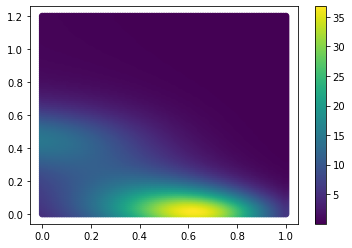

In [12]:
import matplotlib.pyplot as plt
plt.scatter(XX,YY,c = actual)
plt.colorbar()

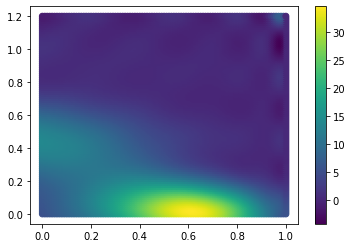

In [13]:
plt.scatter(XX,YY,c = estimate)
plt.colorbar()

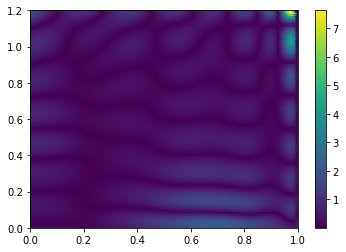

In [14]:
plt.scatter(XX,YY,c = Diff)
plt.xlim([0,1])
plt.ylim((0,1.2))
plt.colorbar()

In [15]:
# from scipy import integrate
# from scipy import special
# from scipy import interpolate

In [16]:
# a = -1
# b = 1
# pol_deg = 30
# beta = 1/20
# def orth_p(dim):
#     # k = dim is the actual dimension-1
#     x_vec = np.linspace(a,b,pol_deg+1) 
#     if dim == 0:
#         func_lbd = lambda x: np.exp(-beta*(x**2 - 1)**2)
#     else:
#         func_lbd = lambda x: np.exp(-beta*0.3*(x**2))

#     y = func_lbd(x_vec)
#     coef = np.polynomial.legendre.legfit(x_vec,y,pol_deg-1) # coefficients in standard polynomials
#     poly = calc_pol(pol_deg-1)

#     zk_temp, err = integrate.quad(func_lbd,a,b)
# #     coef = coef/zk_temp

#     return poly,coef

In [17]:
# pol_element1,pol_coef1 = orth_p(0)
# pol_element2,pol_coef2 = orth_p(0)
# estimate_dbwl = 0
# x_vec = np.linspace(-1,1,101)
# x = np.linspace(-1,1,101)
# # x = 0.5*np.ones(41)
# y = np.linspace(-1,1,101)
# XX,YY = np.meshgrid(x,y)
# XX = XX.ravel()
# YY = YY.ravel()
# for i in range(pol_deg):
#     for j in range(pol_deg):
#         estimate_dbwl+=pol_coef1[i]*pol_element1[i](XX)*pol_coef2[i]*pol_element2[i](YY)

In [18]:
# fun_actual = np.exp(-beta*(XX**2 - 1)**2+(-beta)*0.3*(YY**2))

# plt.scatter(XX,YY,c = fun_actual)
# plt.colorbar()

In [19]:
# plt.scatter(XX,YY,c = estimate_dbwl)
# plt.colorbar()

In [20]:
# Diff = np.abs(fun_actual - estimate_dbwl)
# RMSE = np.sqrt(np.mean(np.square(Diff)))
# print(RMSE)
# plt.scatter(XX,YY,c = Diff)
# plt.colorbar()